In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## FUNCTIONS 

In [3]:
#function to convert dtype into dates( from date as object to date as date "timestamp")
def to_date(data,format):
    df=data
    #df=df.rename(columns={'DATEENREGISTREMENT':'timestamp'})
    df['timestamp'] = pd.to_datetime(df['timestamp'], format=format, errors='coerce')
    # Drop rows with NaT values in the 'timestamp' column.
    df.dropna(subset=['timestamp'], inplace=True)
    df['Year'] = df['timestamp'].dt.year
    df['Month'] = df['timestamp'].dt.month
    df['Day'] = df['timestamp'].dt.day
    del df['timestamp']
    return df

In [4]:
def risk_op(data):
    df=data
    Fraud_op = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME'] == 'O')]
    data['RISK_OP'] = data['ID_OPERATEUR'].isin(Fraud_op['ID_OPERATEUR'].unique()).astype(int)
    return df

In [5]:
def risk_tr(data):
    df=data
    Fraud_tr = data[(data['FRAUD'] == 1) & (data['DECLARANT_POUR_LUI_MEME'] == 'N')]
    data['RISK_tr'] = data['ID_TRANSITAIRE'].isin(Fraud_tr['ID_TRANSITAIRE'].unique()).astype(int)
    return df 

In [6]:
path=r"D:\dataset new version\new_dataset.csv"

In [7]:
df=pd.read_csv(path,sep=',',low_memory=False)

In [8]:
df.head()

,ID_DUM,ID_TRANSITAIRE,timestamp,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,COD_FRANCHISE,FRAUD,DECLARANT_PR
0,14797661,1005,2014-02-10 11:50:15.027000000,245324,1,21946.0,2095.00,2095.00,100,2,NaN,NaN,0,N
1,15289810,2001,2014-08-01 15:11:52.150000000,249725,1,125586.0,1700.00,1760.00,100,2,NaN,NaN,0,N
2,15345977,1005,2014-09-04 10:46:55.800000000,247286,1,786673.0,4682.94,4684.25,100,2,NaN,NaN,0,N
3,15477796,1075,2014-10-21 09:04:38.323000000,1109,4,2731389.0,123394.00,123394.00,100,2,NaN,NaN,0,N
4,17150681,11587,2016-01-15 12:35:22.837000000,258062,3,1696083.0,131467.00,137880.00,100,2,NaN,NaN,0,N


In [9]:
df=df.rename(columns={'DECLARANT_PR':'DECLARANT_POUR_LUI_MEME'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025879 entries, 0 to 10025878
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ID_DUM                   int64  
 1   ID_TRANSITAIRE           int64  
 2   timestamp                object 
 3   ID_OPERATEUR             int64  
 4   NOMBRE_ARTICLES          int64  
 5   VALEUR_DUM_DECLAREE      float64
 6   POIDS_NET                float64
 7   POIDS_BRUT               float64
 8   COD_BD                   int64  
 9   COD_RD                   int64  
 10  COD_ACCORD               object 
 11  COD_FRANCHISE            float64
 12  FRAUD                    int64  
 13  DECLARANT_POUR_LUI_MEME  object 
dtypes: float64(4), int64(7), object(3)
memory usage: 1.0+ GB


## DATA PREPROCESSING

In [11]:
df=df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10025865 entries, 0 to 10025878
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ID_DUM                   int64  
 1   ID_TRANSITAIRE           int64  
 2   timestamp                object 
 3   ID_OPERATEUR             int64  
 4   NOMBRE_ARTICLES          int64  
 5   VALEUR_DUM_DECLAREE      float64
 6   POIDS_NET                float64
 7   POIDS_BRUT               float64
 8   COD_BD                   int64  
 9   COD_RD                   int64  
 10  COD_ACCORD               object 
 11  COD_FRANCHISE            float64
 12  FRAUD                    int64  
 13  DECLARANT_POUR_LUI_MEME  object 
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ GB


In [13]:
df.isna().sum()

ID_DUM                           0
ID_TRANSITAIRE                   0
timestamp                        0
ID_OPERATEUR                     0
NOMBRE_ARTICLES                  0
VALEUR_DUM_DECLAREE              4
POIDS_NET                        0
POIDS_BRUT                   54775
COD_BD                           0
COD_RD                           0
COD_ACCORD                 7368671
COD_FRANCHISE              9693924
FRAUD                            0
DECLARANT_POUR_LUI_MEME          0
dtype: int64

In [14]:
del df['COD_FRANCHISE']

In [15]:
df.dropna(subset=['POIDS_BRUT'], inplace=True)

In [16]:
df.isna().sum()

ID_DUM                           0
ID_TRANSITAIRE                   0
timestamp                        0
ID_OPERATEUR                     0
NOMBRE_ARTICLES                  0
VALEUR_DUM_DECLAREE              0
POIDS_NET                        0
POIDS_BRUT                       0
COD_BD                           0
COD_RD                           0
COD_ACCORD                 7313896
FRAUD                            0
DECLARANT_POUR_LUI_MEME          0
dtype: int64

### convert Date 

In [17]:
df=to_date(df,format='mixed')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9971090 entries, 0 to 10025878
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ID_DUM                   int64  
 1   ID_TRANSITAIRE           int64  
 2   ID_OPERATEUR             int64  
 3   NOMBRE_ARTICLES          int64  
 4   VALEUR_DUM_DECLAREE      float64
 5   POIDS_NET                float64
 6   POIDS_BRUT               float64
 7   COD_BD                   int64  
 8   COD_RD                   int64  
 9   COD_ACCORD               object 
 10  FRAUD                    int64  
 11  DECLARANT_POUR_LUI_MEME  object 
 12  Year                     int32  
 13  Month                    int32  
 14  Day                      int32  
dtypes: float64(3), int32(3), int64(7), object(2)
memory usage: 1.1+ GB


In [19]:
df.shape

(9971090, 15)

In [20]:
df.head()

,ID_DUM,ID_TRANSITAIRE,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,FRAUD,DECLARANT_POUR_LUI_MEME,Year,Month,Day
0,14797661,1005,245324,1,21946.0,2095.00,2095.00,100,2,NaN,0,N,2014,2,10
1,15289810,2001,249725,1,125586.0,1700.00,1760.00,100,2,NaN,0,N,2014,8,1
2,15345977,1005,247286,1,786673.0,4682.94,4684.25,100,2,NaN,0,N,2014,9,4
3,15477796,1075,1109,4,2731389.0,123394.00,123394.00,100,2,NaN,0,N,2014,10,21
4,17150681,11587,258062,3,1696083.0,131467.00,137880.00,100,2,NaN,0,N,2016,1,15


In [21]:
df[df['Year'] == 2016].value_counts()

ID_DUM    ID_TRANSITAIRE  ID_OPERATEUR  NOMBRE_ARTICLES  VALEUR_DUM_DECLAREE  POIDS_NET  POIDS_BRUT  COD_BD  COD_RD  COD_ACCORD  FRAUD  DECLARANT_POUR_LUI_MEME  Year  Month  Day
17030172  174681          15956         2                1205314.00           10960.00   13640.0     309     10      TR          0      N                        2016  1      4      1
18320342  1250            3460          5                214121.00            6870.16    7501.0      301     10      UE          0      N                        2016  8      25     1
18320217  1236            4106          5                34173.00             40.00      42.6        301     10      UE          0      N                        2016  8      25     1
18320218  48249           16762         1                1172.00              0.68       1.0         301     10      USA         0      N                        2016  8      26     1
18320219  1086            4595          1                3846.00              0.40       1

In [22]:
df = df[df['Year'] >= 2016]

In [23]:
df['Year'].value_counts()

Year
2022    1811865
2021    1460099
2019    1090806
2018    1035027
2017     974753
2020     971533
2016     916165
Name: count, dtype: int64

In [24]:
df.shape

(8260248, 15)

### convert categorical

In [25]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder=LabelEncoder()
df['DECLARANT_POUR_LUI_MEME']=LabelEncoder.fit_transform(df['DECLARANT_POUR_LUI_MEME'])
df['COD_ACCORD']=LabelEncoder.fit_transform(df['COD_ACCORD'])

In [26]:
df.head()

,ID_DUM,ID_TRANSITAIRE,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,FRAUD,DECLARANT_POUR_LUI_MEME,Year,Month,Day
4,17150681,11587,258062,3,1696083.0,131467.0,137880.0,100,2,19,0,0,2016,1,15
5,18249526,44584,13864,1,825795.0,7800.0,7800.0,100,2,16,0,0,2016,8,15
6,18917624,11554,1002,1,62633.0,1200.0,1300.0,100,2,19,0,0,2016,12,19
7,19242382,1007,9295,1,643438.0,53660.0,53660.0,100,2,10,0,0,2017,2,17
8,19417229,11554,1002,1,18554636.0,3390575.0,3500000.0,100,2,19,0,0,2017,3,21


In [27]:
df=risk_op(df)

In [28]:
df.head()

,ID_DUM,ID_TRANSITAIRE,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,FRAUD,DECLARANT_POUR_LUI_MEME,Year,Month,Day,RISK_OP
4,17150681,11587,258062,3,1696083.0,131467.0,137880.0,100,2,19,0,0,2016,1,15,0
5,18249526,44584,13864,1,825795.0,7800.0,7800.0,100,2,16,0,0,2016,8,15,0
6,18917624,11554,1002,1,62633.0,1200.0,1300.0,100,2,19,0,0,2016,12,19,0
7,19242382,1007,9295,1,643438.0,53660.0,53660.0,100,2,10,0,0,2017,2,17,0
8,19417229,11554,1002,1,18554636.0,3390575.0,3500000.0,100,2,19,0,0,2017,3,21,0


In [29]:
df=risk_tr(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260248 entries, 4 to 10025878
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ID_DUM                   int64  
 1   ID_TRANSITAIRE           int64  
 2   ID_OPERATEUR             int64  
 3   NOMBRE_ARTICLES          int64  
 4   VALEUR_DUM_DECLAREE      float64
 5   POIDS_NET                float64
 6   POIDS_BRUT               float64
 7   COD_BD                   int64  
 8   COD_RD                   int64  
 9   COD_ACCORD               int32  
 10  FRAUD                    int64  
 11  DECLARANT_POUR_LUI_MEME  int32  
 12  Year                     int32  
 13  Month                    int32  
 14  Day                      int32  
 15  RISK_OP                  int32  
 16  RISK_tr                  int32  
dtypes: float64(3), int32(7), int64(7)
memory usage: 913.8 MB


In [31]:
df2=df.copy()

In [32]:
#Normalization
y_all = df.pop('FRAUD') 

cols=['ID_DUM','ID_TRANSITAIRE','ID_OPERATEUR','NOMBRE_ARTICLES','VALEUR_DUM_DECLAREE','POIDS_NET','POIDS_BRUT','COD_BD','COD_RD','COD_ACCORD','Year','Month','Day']
numerical_cols = df[cols]

df[numerical_cols.columns] = (numerical_cols - numerical_cols.mean()) / numerical_cols.std()

df.head()


,ID_DUM,ID_TRANSITAIRE,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,DECLARANT_POUR_LUI_MEME,Year,Month,Day,RISK_OP,RISK_tr
4,-1.715781,-0.307328,0.718167,0.007378,0.103869,0.060439,0.022110,-2.911485,-0.582954,0.463808,0,-1.675178,-1.616045,-0.101445,0,0
5,-1.498903,0.015349,-0.644754,-0.223642,0.016271,-0.038403,-0.015002,-2.911485,-0.582954,-0.970663,0,-1.675178,0.401598,-0.101445,0,0
6,-1.367041,-0.307651,-0.716539,-0.223642,-0.060543,-0.043678,-0.016856,-2.911485,-0.582954,0.463808,0,-1.675178,1.554537,0.355546,0,0
7,-1.302944,-0.410790,-0.670254,-0.223642,-0.002083,-0.001749,-0.001918,-2.911485,-0.582954,-3.839605,0,-1.187518,-1.327811,0.127050,0,0
8,-1.268435,-0.307651,-0.716539,-0.223642,1.800737,2.665306,0.981324,-2.911485,-0.582954,0.463808,0,-1.187518,-1.039576,0.584041,0,0


In [33]:
df['FRAUD']=y_all

In [34]:
df.isnull().sum()

ID_DUM                     0
ID_TRANSITAIRE             0
ID_OPERATEUR               0
NOMBRE_ARTICLES            0
VALEUR_DUM_DECLAREE        0
POIDS_NET                  0
POIDS_BRUT                 0
COD_BD                     0
COD_RD                     0
COD_ACCORD                 0
DECLARANT_POUR_LUI_MEME    0
Year                       0
Month                      0
Day                        0
RISK_OP                    0
RISK_tr                    0
FRAUD                      0
dtype: int64

# AUTOENCODER V01 on the new data

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
df.head()

,ID_DUM,ID_TRANSITAIRE,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,DECLARANT_POUR_LUI_MEME,Year,Month,Day,RISK_OP,RISK_tr,FRAUD
4,-1.715781,-0.307328,0.718167,0.007378,0.103869,0.060439,0.022110,-2.911485,-0.582954,0.463808,0,-1.675178,-1.616045,-0.101445,0,0,0
5,-1.498903,0.015349,-0.644754,-0.223642,0.016271,-0.038403,-0.015002,-2.911485,-0.582954,-0.970663,0,-1.675178,0.401598,-0.101445,0,0,0
6,-1.367041,-0.307651,-0.716539,-0.223642,-0.060543,-0.043678,-0.016856,-2.911485,-0.582954,0.463808,0,-1.675178,1.554537,0.355546,0,0,0
7,-1.302944,-0.410790,-0.670254,-0.223642,-0.002083,-0.001749,-0.001918,-2.911485,-0.582954,-3.839605,0,-1.187518,-1.327811,0.127050,0,0,0
8,-1.268435,-0.307651,-0.716539,-0.223642,1.800737,2.665306,0.981324,-2.911485,-0.582954,0.463808,0,-1.187518,-1.039576,0.584041,0,0,0


In [37]:
#function to select a desired size of the data
def select_data(data, select_percent=0.8):
    select_size = int(len(data) * select_percent)
    selected_data = data[:select_size]
    return selected_data

df=select_data(df,0.2)


In [38]:
df.shape

(1652049, 17)

In [39]:
#function split dataframe into multiple dataframe
target='FRAUD'
def splitDataFrameIntoSmaller(df, target):
    """
    split dataframe into smaller dataframe
    """
    l= df[target].unique()
    list_df = []
    for i in l:
        list_df.append(df[df[target]==i])
    return list_df

ldf=splitDataFrameIntoSmaller(df,target)

In [40]:
normal_events=ldf[0] #THE NORMAL DATA SET WITH THE AC VALUES 
abnormal_events=ldf[1]#THE ABNORMAL DATASET WITH THE VP VALUES
y_abnormal=abnormal_events.pop('FRAUD')
y_normal=normal_events.pop('FRAUD')

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normal_events,y_normal, test_size=0.2, random_state=42)

In [43]:

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1302712, 16)
Shape of X_test: (325679, 16)
Shape of y_train: (1302712,)
Shape of y_test: (325679,)


In [44]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [46]:
class AnomalyDetector(Model):
  def __init__(self, input_dim):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(14, activation="relu")])

    self.decoder=tf.keras.Sequential([
      layers.Dense(16,activation='relu'),
      layers.Dense(32,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(input_dim, activation="sigmoid")
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

input_dim=X_train.shape[1]
autoencoder = AnomalyDetector(input_dim)

autoencoder.compile(optimizer='adam', loss='mae')

In [47]:
history = autoencoder.fit(X_train, X_train, 
          epochs=15, 
          batch_size=1024,
          validation_data=(X_test, X_test),
          shuffle=True)

Epoch 1/15
1273/1273 [==============================] - 6s 4ms/step - loss: 0.4627 - val_loss: 0.4282
Epoch 2/15
1273/1273 [==============================] - 4s 4ms/step - loss: 0.4257 - val_loss: 0.4211
Epoch 3/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.4202 - val_loss: 0.4205
Epoch 4/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.4196 - val_loss: 0.4198
Epoch 5/15
1273/1273 [==============================] - 6s 5ms/step - loss: 0.4192 - val_loss: 0.4195
Epoch 6/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.4112 - val_loss: 0.4055
Epoch 7/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4050 - val_loss: 0.4058
Epoch 8/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4046 - val_loss: 0.4055
Epoch 9/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.4043 - val_loss: 0.4048
Epoch 10/15
1273/1273 [==============================] - 5s 4ms/step - loss: 0.404

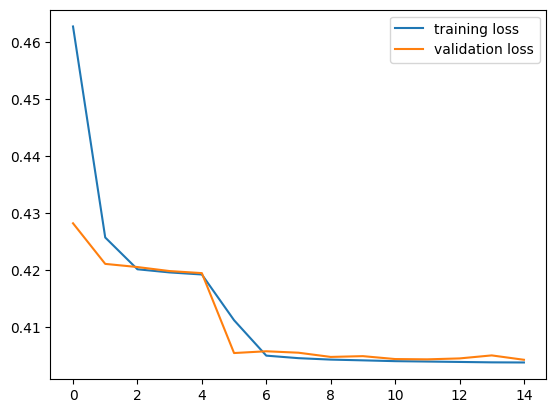

In [48]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

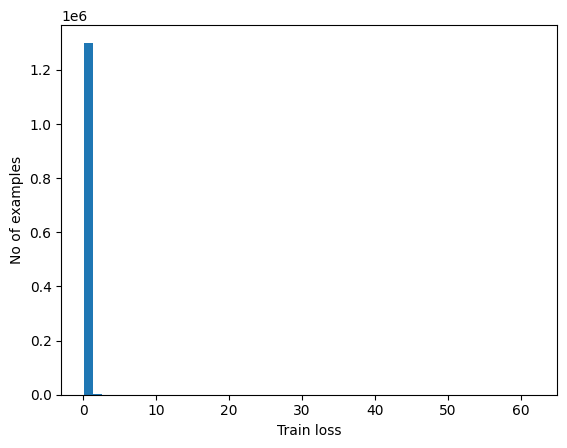

In [49]:
reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [50]:
threshold = np.mean(train_loss) +6* np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  1.6131509961301167


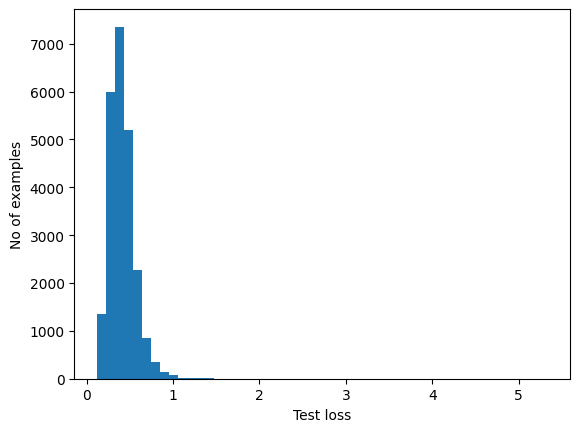

In [51]:
reconstructions = autoencoder.predict(abnormal_events)
test_loss = tf.keras.losses.mae(reconstructions, abnormal_events)
plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [52]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  # Plot the trade-off between recall and accuracy
  plt.figure(figsize=(8, 6))
  plt.plot(recall_score(labels, predictions),accuracy_score(labels, predictions), marker='o', linestyle='-', color='b')
  plt.title('Recall vs. Accuracy Trade-off')
  plt.xlabel('Recall')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.show()

In [53]:
y_all=df.pop('FRAUD')

In [54]:
data=tf.convert_to_tensor(df) 

Accuracy = 0.015478959764510617
Precision = 0.014319937796842208
Recall = 0.9987741990024516


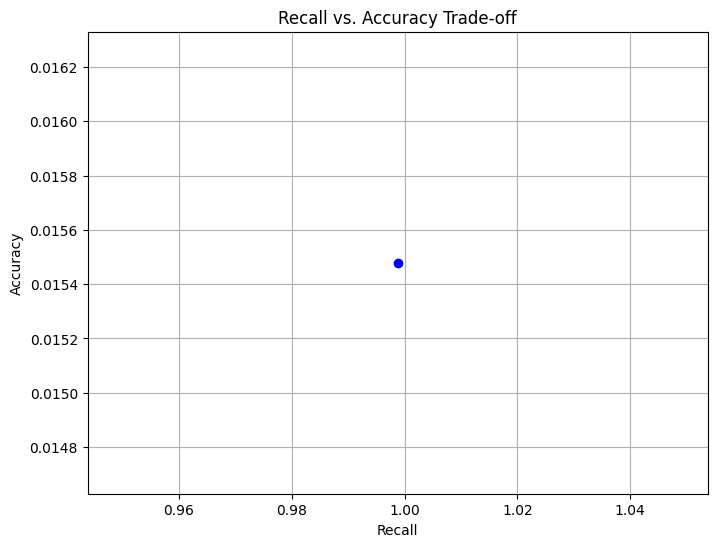

In [55]:
preds = predict(autoencoder, data, threshold)
print_stats(preds, y_all)

In [56]:

from sklearn.metrics import roc_curve, auc
# Calculate reconstruction errors (MSE in this case)
test_loss = tf.keras.losses.mae(reconstructions, abnormal_events)

# Create binary labels based on a threshold (you can adjust this threshold)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(X_test, test_loss)  # Replace true_labels with your ground truth labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ValueError: continuous-multioutput format is not supported

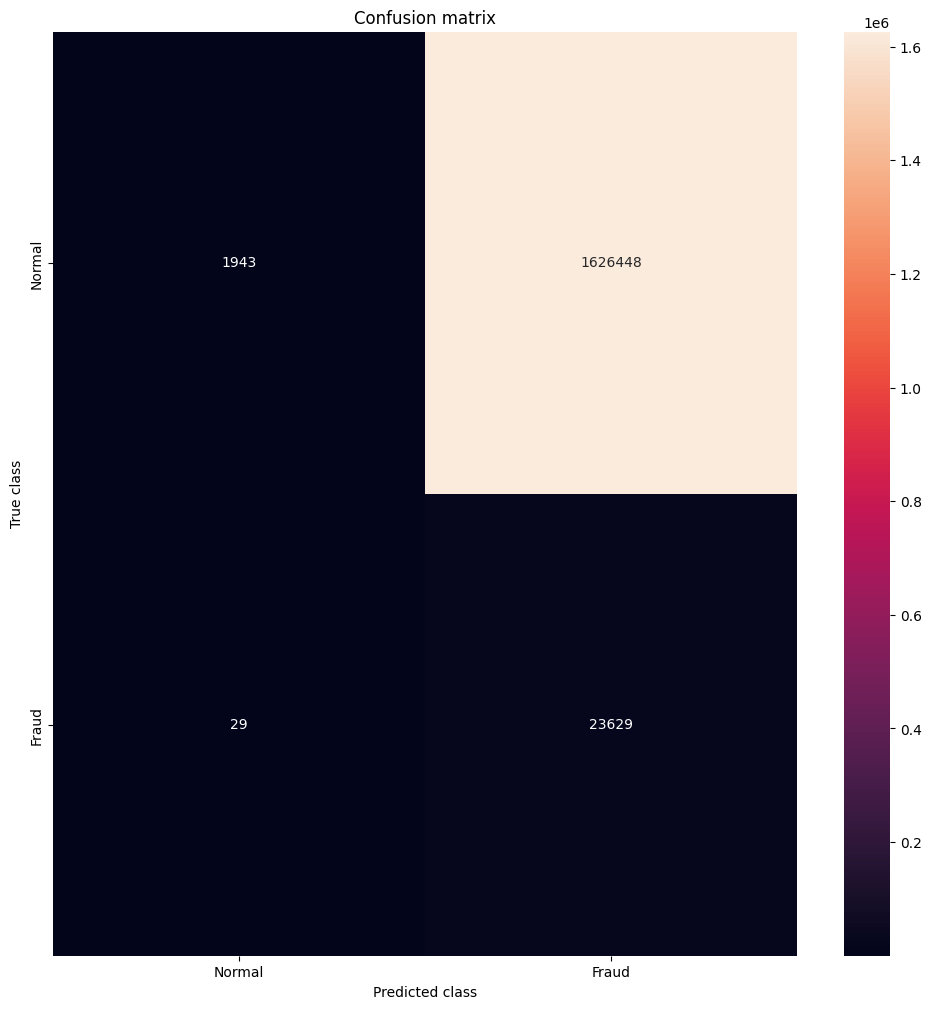

In [57]:
LABELS=['Normal','Fraud']
confusion_matrix = pd.crosstab(y_all, preds)
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# AUTOENCODER VERSION 02

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260248 entries, 4 to 10025878
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ID_DUM                   int64  
 1   ID_TRANSITAIRE           int64  
 2   ID_OPERATEUR             int64  
 3   NOMBRE_ARTICLES          int64  
 4   VALEUR_DUM_DECLAREE      float64
 5   POIDS_NET                float64
 6   POIDS_BRUT               float64
 7   COD_BD                   int64  
 8   COD_RD                   int64  
 9   COD_ACCORD               int32  
 10  FRAUD                    int64  
 11  DECLARANT_POUR_LUI_MEME  int32  
 12  Year                     int32  
 13  Month                    int32  
 14  Day                      int32  
 15  RISK_OP                  int32  
 16  RISK_tr                  int32  
dtypes: float64(3), int32(7), int64(7)
memory usage: 913.8 MB


In [59]:
df2.head()

,ID_DUM,ID_TRANSITAIRE,ID_OPERATEUR,NOMBRE_ARTICLES,VALEUR_DUM_DECLAREE,POIDS_NET,POIDS_BRUT,COD_BD,COD_RD,COD_ACCORD,FRAUD,DECLARANT_POUR_LUI_MEME,Year,Month,Day,RISK_OP,RISK_tr
4,17150681,11587,258062,3,1696083.0,131467.0,137880.0,100,2,19,0,0,2016,1,15,0,0
5,18249526,44584,13864,1,825795.0,7800.0,7800.0,100,2,16,0,0,2016,8,15,0,0
6,18917624,11554,1002,1,62633.0,1200.0,1300.0,100,2,19,0,0,2016,12,19,0,0
7,19242382,1007,9295,1,643438.0,53660.0,53660.0,100,2,10,0,0,2017,2,17,0,0
8,19417229,11554,1002,1,18554636.0,3390575.0,3500000.0,100,2,19,0,0,2017,3,21,0,0


In [60]:
frauds=df2[df2.FRAUD == 1]
normal=df2[df2.FRAUD == 0]
frauds.shape

(111930, 17)

In [61]:
normal.shape

(8148318, 17)

In [62]:
frauds['ID_DUM'].describe()

count    1.119300e+05
mean     2.513853e+07
std      4.553410e+06
min      1.706682e+07
25%      2.111439e+07
50%      2.479362e+07
75%      2.848137e+07
max      3.396438e+07
Name: ID_DUM, dtype: float64

In [63]:
normal['ID_DUM'].describe()

count    8.148318e+06
mean     2.585363e+07
std      5.072656e+06
min      1.632880e+07
25%      2.131901e+07
50%      2.600872e+07
75%      3.026096e+07
max      3.425461e+07
Name: ID_DUM, dtype: float64

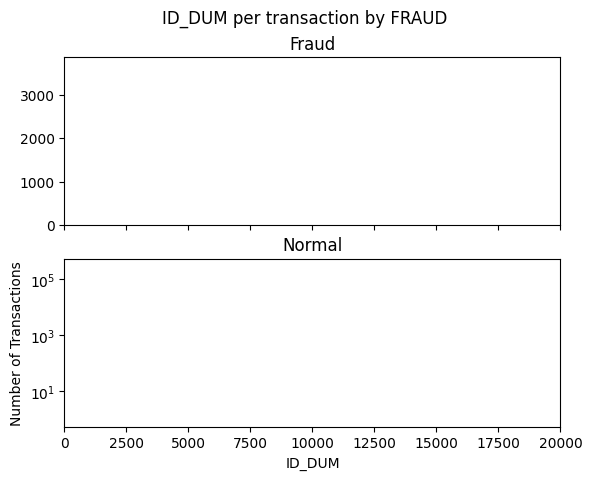

In [64]:
#graphical representaion of the preposed approach
#ANOTHER GRAPH ON THE VALUE 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('ID_DUM per transaction by FRAUD')

bins = 50

ax1.hist(frauds['ID_DUM'], bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal['ID_DUM'], bins = bins)
ax2.set_title('Normal')

plt.xlabel('ID_DUM')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

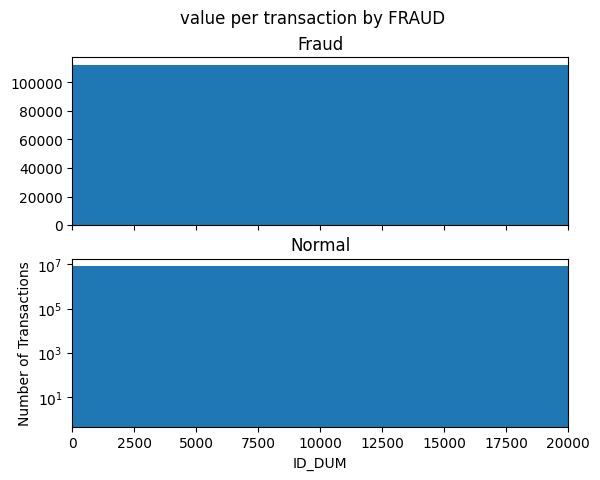

In [65]:
#ANOTHER GRAPH ON THE VALUE 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('value per transaction by FRAUD')

bins = 50

ax1.hist(frauds['VALEUR_DUM_DECLAREE'], bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal['VALEUR_DUM_DECLAREE'], bins = bins)
ax2.set_title('Normal')

plt.xlabel('ID_DUM')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [66]:
data=df2.drop(['Year','Month','Day'],axis=1)

In [67]:
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [68]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.FRAUD == 0]
X_train = X_train.drop(['FRAUD'], axis=1)
y_test = X_test['FRAUD']
X_test = X_test.drop(['FRAUD'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(6518615, 13)

In [69]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [71]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(0.01))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [72]:
nb_epoch = 15
batch_size = 2048
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/15
3183/3183 [==============================] - 12s 3ms/step - loss: 0.5207 - accuracy: 0.7708 - val_loss: 0.4244 - val_accuracy: 0.8796
Epoch 2/15
3183/3183 [==============================] - 11s 4ms/step - loss: 0.4062 - accuracy: 0.8918 - val_loss: 0.3977 - val_accuracy: 0.8949
Epoch 3/15
 815/3183 [======>.......................] - ETA: 7s - loss: 0.5844 - accuracy: 0.8933

KeyboardInterrupt: 

In [ ]:

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
class AnomalyDetector(Model):
  def __init__(self, input_dim):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(14, activation="relu")])

    self.decoder=tf.keras.Sequential([
      layers.Dense(16,activation='relu'),
      layers.Dense(32,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(input_dim, activation="sigmoid")
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

input_dim=X_train.shape[1]
autoencoder = AnomalyDetector(input_dim)

autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
history = autoencoder.fit(X_train, X_train, 
          epochs=15, 
          batch_size=1024,
          validation_data=(X_test, X_test),
          shuffle=True)

Epoch 1/15
1273/1273 [==============================] - 5s 3ms/step - loss: 0.4525 - val_loss: 0.4091
Epoch 2/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4067 - val_loss: 0.4062
Epoch 3/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4056 - val_loss: 0.4060
Epoch 4/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4052 - val_loss: 0.4058
Epoch 5/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4048 - val_loss: 0.4061
Epoch 6/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4045 - val_loss: 0.4049
Epoch 7/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4042 - val_loss: 0.4046
Epoch 8/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4041 - val_loss: 0.4048
Epoch 9/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.4040 - val_loss: 0.4046
Epoch 10/15
1273/1273 [==============================] - 4s 3ms/step - loss: 0.403

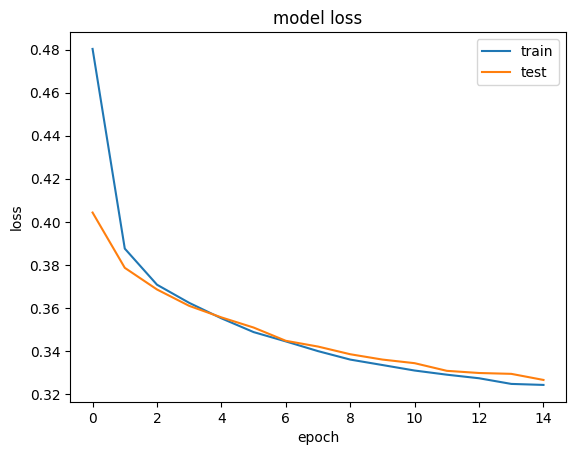

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,1.652050e+06,1.652050e+06
mean,3.252685e-01,1.352683e-02
std,1.045159e+02,1.155156e-01
min,5.288226e-03,0.000000e+00
25%,6.709546e-02,0.000000e+00
50%,1.161776e-01,0.000000e+00
75%,2.041793e-01,0.000000e+00
max,1.328934e+05,1.000000e+00


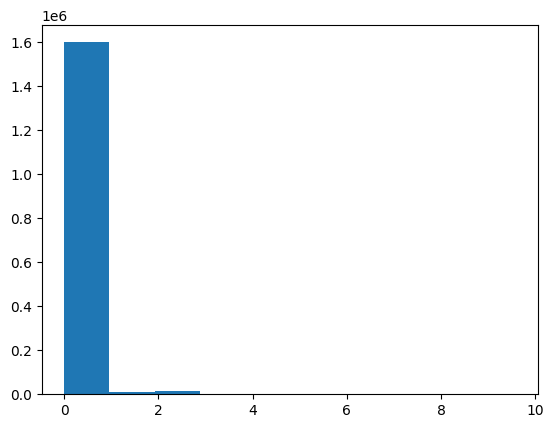

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

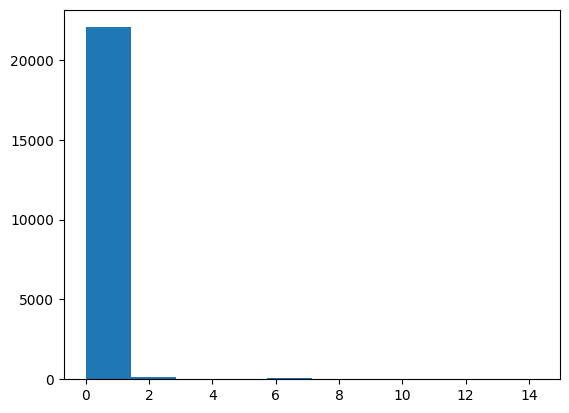

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

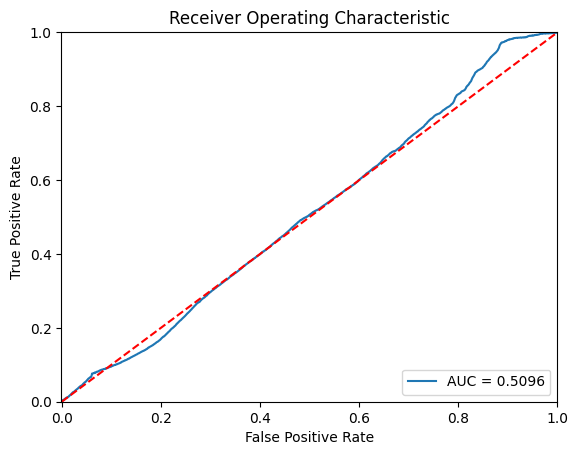

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

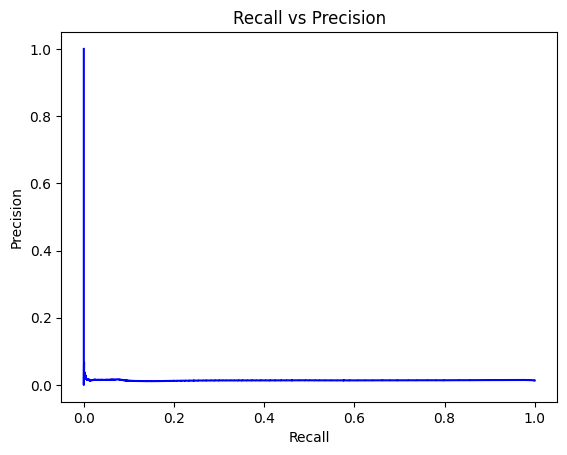

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

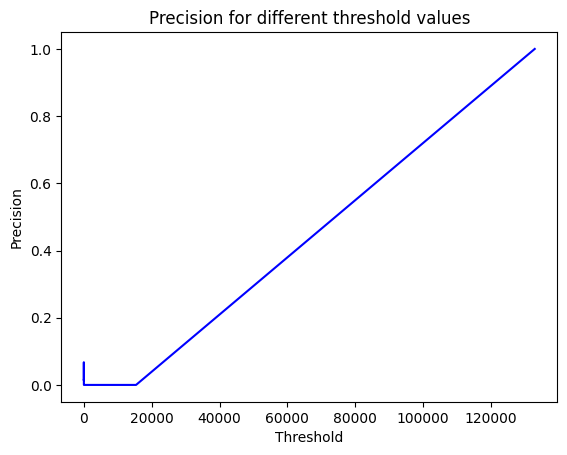

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

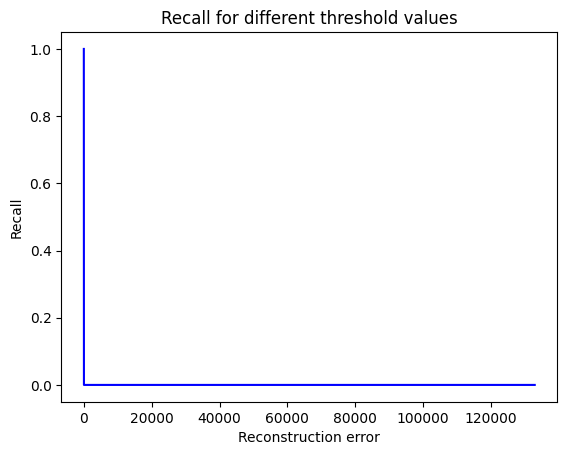

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

### Predicton

In [ ]:
threshold =0.2

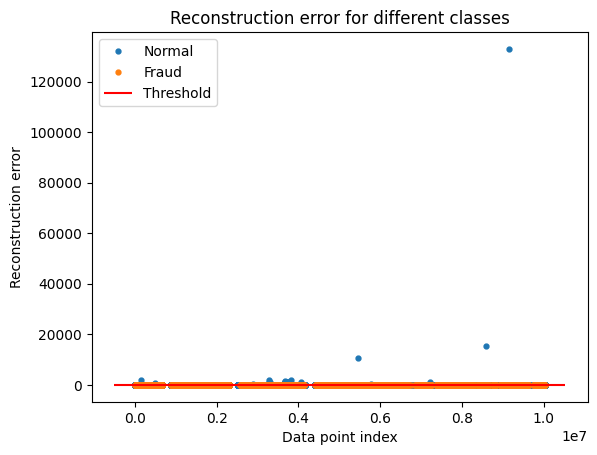

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

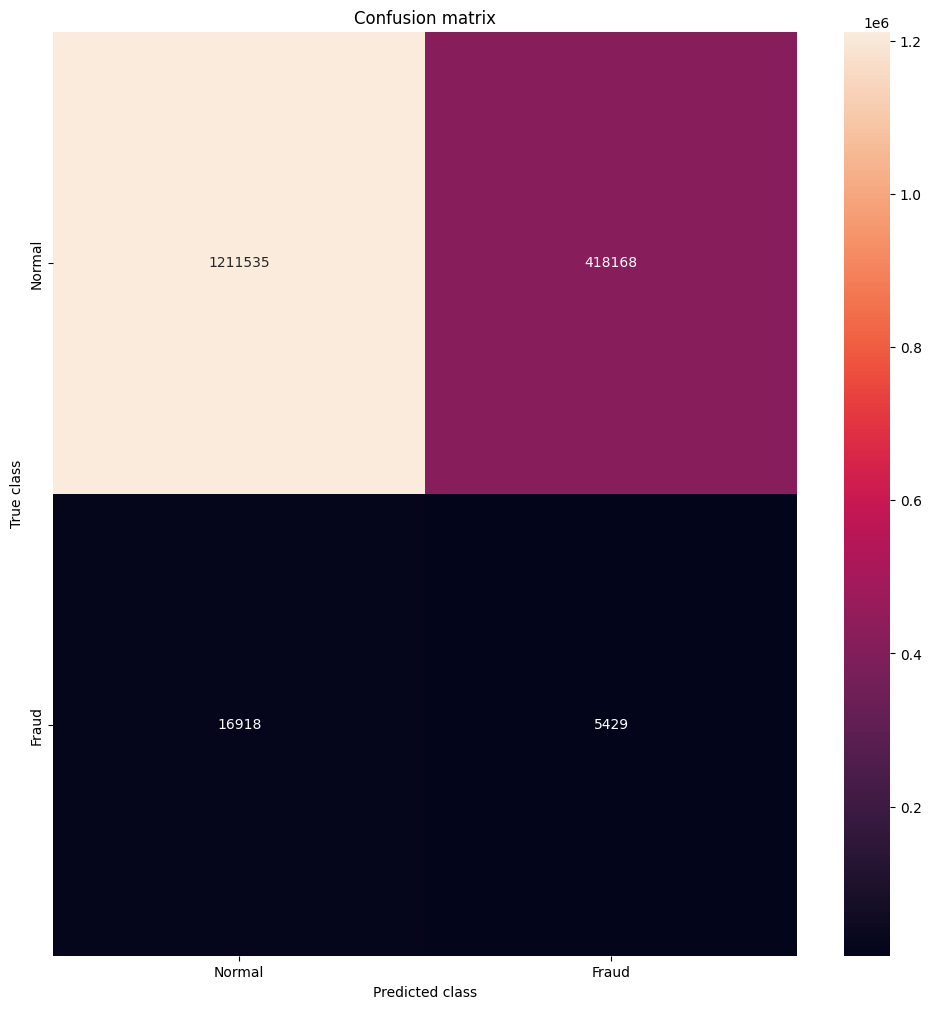

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()